<a href="https://colab.research.google.com/github/armishr/activity-detection/blob/main/movement_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing functions

In [ ]:
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [ ]:
slice_len = input_length = 30
SIT = 0 
WALK = 1
JOG = 2
TO_SKIP = 16

In [ ]:
!unzip /content/training-test-accelerometer.zip

Archive:  /content/training-test-accelerometer.zip
   creating: training-test-accelerometer/
   creating: training-test-accelerometer/jog/
   creating: training-test-accelerometer/jog/jog_16/
  inflating: training-test-accelerometer/jog/jog_16/sub_1.csv  
  inflating: training-test-accelerometer/jog/jog_16/sub_10.csv  
  inflating: training-test-accelerometer/jog/jog_16/sub_11.csv  
  inflating: training-test-accelerometer/jog/jog_16/sub_12.csv  
  inflating: training-test-accelerometer/jog/jog_16/sub_13.csv  
  inflating: training-test-accelerometer/jog/jog_16/sub_14.csv  
  inflating: training-test-accelerometer/jog/jog_16/sub_15.csv  
  inflating: training-test-accelerometer/jog/jog_16/sub_16.csv  
  inflating: training-test-accelerometer/jog/jog_16/sub_17.csv  
  inflating: training-test-accelerometer/jog/jog_16/sub_18.csv  
  inflating: training-test-accelerometer/jog/jog_16/sub_19.csv  
  inflating: training-test-accelerometer/jog/jog_16/sub_2.csv  
  inflating: training-test-acc

In [ ]:
dir_walk = '/content/training-test-accelerometer/walk'
dir_jog = '/content/training-test-accelerometer/jog'
dir_stand = '/content/training-test-accelerometer/stand'
dir_sit = '/content/training-test-accelerometer/sit'
walk_files = []
jog_files = []
stand_files = []
sit_files = []
for walk in os.listdir(dir_walk):
  for f in os.listdir(os.path.join(dir_walk,walk)):
    walk_files.append(os.path.join(dir_walk,walk,f))

for jog in os.listdir(dir_jog):
  for f in os.listdir(os.path.join(dir_jog,jog)):
    jog_files.append(os.path.join(dir_jog,jog,f))

for stand in os.listdir(dir_stand):
  for f in os.listdir(os.path.join(dir_stand,stand)):
    stand_files.append(os.path.join(dir_stand,stand,f))
for sit in os.listdir(dir_sit):
  for f in os.listdir(os.path.join(dir_sit,sit)):
    sit_files.append(os.path.join(dir_sit,sit,f))

In [ ]:
df_walk = []
df_jog = []
df_stand = []
df_sit = []
for i in walk_files:
  a_i = pd.read_csv(i)
  a_i = a_i[['userAcceleration.x','userAcceleration.y','userAcceleration.z']]
  a_i = a_i.rename(columns = {'userAcceleration.x':'gFx','userAcceleration.y':'gFy','userAcceleration.z':'gFz'})
  df_walk.append(a_i)
for i in jog_files:
  a_i = pd.read_csv(i)
  a_i = a_i[['userAcceleration.x','userAcceleration.y','userAcceleration.z']]
  a_i = a_i.rename(columns = {'userAcceleration.x':'gFx','userAcceleration.y':'gFy','userAcceleration.z':'gFz'})
  df_jog.append(a_i)
for i in stand_files:
  a_i = pd.read_csv(i)
  a_i = a_i[['userAcceleration.x','userAcceleration.y','userAcceleration.z']]
  a_i = a_i.rename(columns = {'userAcceleration.x':'gFx','userAcceleration.y':'gFy','userAcceleration.z':'gFz'})
  df_stand.append(a_i)
for i in sit_files:
  a_i = pd.read_csv(i)
  a_i = a_i[['userAcceleration.x','userAcceleration.y','userAcceleration.z']]
  a_i = a_i.rename(columns = {'userAcceleration.x':'gFx','userAcceleration.y':'gFy','userAcceleration.z':'gFz'})
  df_sit.append(a_i)


len(df_jog)

48

In [ ]:
df_stand[0]

,gFx,gFy,gFz
0,0.005015,0.027795,0.003135
1,0.000139,0.012290,0.004496
2,0.020331,-0.009187,0.019014
3,0.014451,-0.009491,0.027716
4,-0.000852,-0.011274,0.021560
...,...,...,...
7142,-0.020434,0.018307,0.032267
7143,0.006770,0.006677,0.062844
7144,0.024725,0.017514,0.055823
7145,-0.022234,0.012622,0.074642


(-3.0, 3.0)

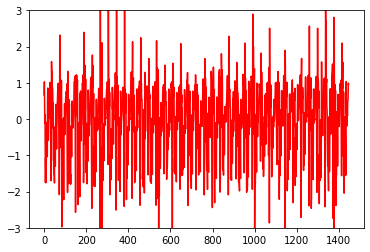

In [ ]:
plt.plot(range(len(df_jog[28][2400::])),df_jog[28]['gFz'][2400::],color = 'red',label = 'gFx')
plt.ylim(-3,3)

In [ ]:
#lets skip by 16(for 80-90 hz) and take 50 inputs, time<60 for walk and sit and time<50 for jog and start from the index 2400
walkData = pd.read_csv('walk_g_1.csv')
sitData = pd.read_csv('sit_g_1.csv')
jogData = pd.read_csv('jog_g_1.csv')

In [ ]:
sitData.head()

,time,gFx,gFy,gFz,TgF
0,0.005010,-0.0765,0.3680,0.9311,1.004
1,0.005380,-0.0685,0.3690,0.9218,0.995
2,0.005604,-0.0702,0.3685,0.9280,1.001
3,0.005975,-0.0749,0.3648,0.9280,1.000
4,0.006187,-0.0886,0.3690,0.9413,1.015


(-3.0, 3.0)

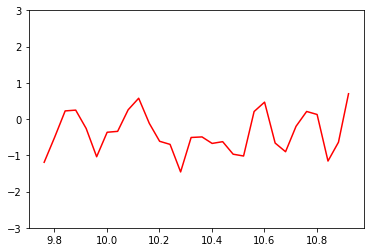

In [ ]:
jogDataset = jogData.loc[2400:4800:16]
jogDataset = jogDataset[70:70 + slice_len]
plt.plot(jogDataset['time'],jogDataset['gFx'],color = 'red',label = 'gFx')
plt.ylim(-3,3)

(-3.0, 3.0)

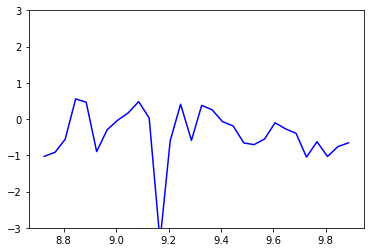

In [ ]:
walkDataset = walkData.loc[2400:4800:16]
walkDataset = walkDataset[60:60 + slice_len]
plt.plot(walkDataset['time'],walkDataset['gFx'],color = 'blue',label = 'gFx')
plt.ylim(-3,3)

(-3.0, 3.0)

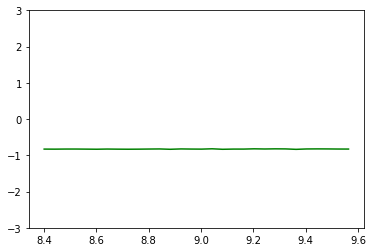

In [ ]:
sitDataset = sitData.loc[2400:4800:16]
sitDataset = sitDataset[60:60 + slice_len]
plt.plot(sitDataset['time'],sitDataset['gFx'],color = 'green',label = 'gFx')
plt.ylim(-3,3)

In [ ]:
sitData = sitData[sitData['time']<60]
walkData = walkData[walkData['time']<60]
jogData = jogData[jogData['time']<50]

sitData = sitData.loc[2400:]
walkData = walkData.loc[2400:]
jogData = jogData.loc[2400:]

sitData = sitData.drop(['time','TgF'],axis = 1)
walkData = walkData.drop(['time','TgF'],axis = 1)
jogData = jogData.drop(['time','TgF'],axis = 1)

In [ ]:
sitData.reset_index(inplace = True,drop = True)
walkData.reset_index(inplace = True,drop = True)
jogData.reset_index(inplace = True,drop = True)

In [ ]:
print(len(sitData))
print(len(walkData))
print(len(jogData))

21576
21443
14835


In [ ]:
sitData = sitData.loc[:len(jogData) - 1]
walkData = walkData.loc[:len(jogData) - 1]

In [ ]:
print(len(sitData))
print(len(walkData))
print(len(jogData))


14835
14835
14835


In [ ]:
def preprocess(data,skip,doMean):
  preP = []
  for i in range(skip):
    pi = data.loc[i::skip]
    ni = len(pi)
   
    for j in range(ni - slice_len):
      pij = pi[j:j+slice_len]
      pij = pij.to_numpy() 
      if(doMean == 1):
        pij = pij - pij.mean(axis = 0) #to remove effect of gravity, is just an approximation
      mod = []
      for p in pij:
        mod.append(p[0]*p[0] + p[1]*p[1] + p[2]*p[2])
      mod = np.array(mod)
      preP.append(mod)

    i+=slice_len

  return preP

In [ ]:
sitSet = preprocess(sitData,TO_SKIP,1)
walkSet = preprocess(walkData,TO_SKIP,1)
jogSet = preprocess(jogData,TO_SKIP,1)



In [ ]:
sub_walkSet = []
sub_jogSet = []
sub_standSet = []
sub_sitSet = []
for i in df_walk:
  sub_walkSet.append(preprocess(i,1,0))
for i in df_jog:
  sub_jogSet.append(preprocess(i,1,0))
for i in df_stand:
  sub_standSet.append(preprocess(i,1,0))
for i in df_sit:
  sub_sitSet.append(preprocess(i,1,0))

In [ ]:
len(jogSet[0])

30

In [ ]:
x = []
y = []
x_2 = []
y_2 = []
x_3 = []
y_3 = []

for i in sitSet:
  x_2.append(i.flatten())
  y_2.append([1,0,0])
  x.append(i.flatten())
  y.append([1,0,0])
for i in walkSet:
  x_2.append(i.flatten())
  y_2.append([0,1,0])
  x.append(i.flatten())
  y.append([0,1,0])
for i in jogSet:
  x_2.append(i.flatten())
  y_2.append([0,0,1])
  x.append(i.flatten())
  y.append([0,0,1])

for i in sub_walkSet:
  for j in i:
    x_3.append(j.flatten())
    y_3.append([0,1,0])
   
for i in sub_jogSet:
  for j in i:
    x_3.append(j.flatten())
    y_3.append([0,0,1])
   
for i in sub_standSet:
  for j in i:
    x_3.append(j.flatten())
    y_3.append([1,0,0])
    
for i in sub_sitSet:
  for j in i:
    x_3.append(j.flatten())
    y_3.append([1,0,0])
    
y = np.array(y)
y_2 = np.array(y_2)
y_3 = np.array(y_3)
x = np.array(x,dtype = np.float32)
x_2 = np.array(x_2,dtype = np.float32)
x_3 = np.array(x_3,dtype = np.float32)

In [ ]:
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size = 0.33)

#Model Training
Making a basic dense layer network with 30 inputs



In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Dense(input_length/2,input_dim = input_length ,activation = 'relu'))
model.add((Dense(10,activation = 'softmax')))
model.add((Dense(3,activation = 'softmax')))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                465       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 658
Trainable params: 658
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,batch_size = 128,epochs = 30,verbose = 1,validation_data = (x_valid,y_valid))

Epoch 1/30
226/226 [==============================] - 4s 5ms/step - loss: 0.9602 - accuracy: 0.6140 - val_loss: 0.8571 - val_accuracy: 0.6760
Epoch 2/30
226/226 [==============================] - 1s 5ms/step - loss: 0.7770 - accuracy: 0.6978 - val_loss: 0.7055 - val_accuracy: 0.7173
Epoch 3/30
226/226 [==============================] - 1s 5ms/step - loss: 0.6391 - accuracy: 0.7357 - val_loss: 0.5811 - val_accuracy: 0.7527
Epoch 4/30
226/226 [==============================] - 1s 5ms/step - loss: 0.5388 - accuracy: 0.7745 - val_loss: 0.5027 - val_accuracy: 0.7876
Epoch 5/30
226/226 [==============================] - 1s 7ms/step - loss: 0.4680 - accuracy: 0.8121 - val_loss: 0.4281 - val_accuracy: 0.8435
Epoch 6/30
226/226 [==============================] - 2s 7ms/step - loss: 0.3669 - accuracy: 0.8858 - val_loss: 0.3010 - val_accuracy: 0.9218
Epoch 7/30
226/226 [==============================] - 1s 5ms/step - loss: 0.2693 - accuracy: 0.9302 - val_loss: 0.2423 - val_accuracy: 0.9368
Epoch 

In [ ]:
model.evaluate(x_3[y_3[:,0]==1],y_3[y_3[:,0] == 1],batch_size = 128) #accuracy for sitting/standing

5019/5019 [==============================] - 11s 2ms/step - loss: 0.0039 - accuracy: 0.9998


[0.003891822649165988, 0.9998365044593811]

In [ ]:
model.evaluate(x_3[y_3[:,1]==1],y_3[y_3[:,1] == 1],batch_size = 128) #accuracy for walking

2673/2673 [==============================] - 7s 3ms/step - loss: 0.8435 - accuracy: 0.7116


[0.843504011631012, 0.7115582227706909]

In [ ]:
model.evaluate(x_3[y_3[:,2]==1],y_3[y_3[:,2] == 1],batch_size = 128) #accuracy for jogging

1038/1038 [==============================] - 3s 2ms/step - loss: 0.4695 - accuracy: 0.8649


[0.46946457028388977, 0.8649004697799683]

In [ ]:
model.evaluate(x_3,y_3,batch_size = 128)

8729/8729 [==============================] - 20s 2ms/step - loss: 0.3163 - accuracy: 0.8955


[0.31633421778678894, 0.8955205678939819]

#Converting model to lite version using tflite
Quantization of model weights and activations

In [ ]:
model.save('/content/class_model')

INFO:tensorflow:Assets written to: /content/class_model/assets


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/class_model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.float32
converter.inference_output_type = tf.float32

In [ ]:
def representative_dataset_generation():
  for i in range(len(x)):
    yield[x[i]]

In [ ]:
converter.representative_dataset = representative_dataset_generation

In [ ]:
tflite_model = converter.convert()
with open('model.tflite','wb') as f:
  f.write(tflite_model)

In [ ]:
print(os.path.getsize('/content/model.tflite') , 'bytes') #size of tflite model after quantization

3416 bytes


In [ ]:
interpreter = tf.lite.Interpreter(model_content = tflite_model)
interpreter.allocate_tensors()

In [ ]:
x_train[56]

array([0.31616092, 0.5535308 , 0.59748787, 2.7711027 , 4.834693  ,
       0.44253156, 1.4300671 , 0.02172472, 0.6731541 , 0.3649465 ,
       0.16997524, 0.24352925, 0.15473479, 0.14144287, 0.01443442,
       0.04901589, 0.02278976, 0.12886208, 0.3529795 , 0.34816116,
       0.4343319 , 0.931339  , 1.1033431 , 2.4166462 , 0.38901806,
       0.57571965, 0.17291535, 0.3780619 , 0.57538193, 0.90963703],
      dtype=float32)

In [ ]:
#checking accuracy after quantization
correct = 0
num = len(x)
for i in range(num):
  input = interpreter.get_input_details()
  output = interpreter.get_output_details()
  input_e = x[i]
  input_e = np.array(input_e)
  input_e = np.reshape(input_e,input[0]['shape'])
  input_e = input_e.astype('float32')
  interpreter.set_tensor(input[0]['index'],input_e)
  interpreter.invoke()
  output = interpreter.get_tensor(output[0]['index']) 
  if(np.argmax(output) == np.argmax(y[i])):
    correct+=1

print('accuracy:',correct/num)

accuracy: 0.955067920585162


In [ ]:
!apt-get update && apt-get -qq install xxd

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://security.ubuntu.com/ubuntu

In [ ]:
!xxd -i model.tflite > helper.cpp

In [ ]:
!cat helper.cpp #final model which is implemented on microcontroller

unsigned char model_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x00, 0x00, 0x28, 0x00, 0x00, 0x00, 0x40, 0x01, 0x00, 0x00,
  0x28, 0x00, 0x00, 0x00, 0xe8, 0x00, 0x00, 0x00, 0x64, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x9c, 0x06, 0x00, 0x00, 0xb4, 0x05, 0x00, 0x00,
  0x04, 0x04, 0x00, 0x00, 0xfc, 0x01, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x3c, 0x01, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0xf8, 0x0c, 0x00, 0x00,
  0xf4, 0x0c, 0x00, 0x00, 0x34, 0x0a, 0x00, 0x00, 0x90, 0x09, 0x00, 0x00,
  0x84, 0x08, 0x00, 0x00, 0xf8, 0x07, 0x00, 0x00, 0x64, 0x07, 0x00, 0x00,
  0xf4, 0x06, 0x00, 0x00, 0xd8, 0x0c, 0x00, 0x00, 0xd4, 0x0c, 0x00, 0x00,
  0xd0, 0x0c, 0x00, 0x00, 0xcc, 0x0c, 0x00, 0x00, 0xc8, 0x0c, 0x00, 0x00,
  0xc4, 0x0c, 0x00, 0x00, 0xc0, 0x0c, 0x00, 0x00, 0xb8, 0x00, 0x00, 0x00,
  0x0